Regression non lineaire simple avec Numpy
==

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

1.Dataset
==

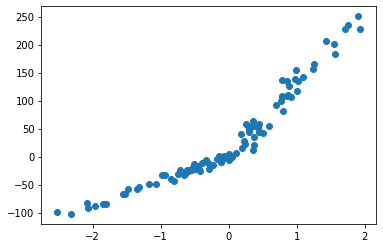

In [62]:
x,y=make_regression(n_samples=100,n_features=1, noise=10)
y=y+abs(y/2)
plt.scatter(x,y) #  afficher les resultat sous forme graphique x en abscisse et y en ordonnées

In [63]:
# verification des dimensions
print(x.shape)
print(y.shape)

(100, 1)
(100,)


In [64]:
#  redimensionner les dimensions
y=y.reshape(y.shape[0],1)
print(y.shape)

(100, 1)


In [65]:
#  construction de la matrice X, incluant le biais
X=np.hstack((x,np.ones(x.shape)))
X=np.hstack((x**2,X))
print(X.shape)
print(X[:10])

(100, 3)
[[ 1.91672110e-01  4.37803734e-01  1.00000000e+00]
 [ 9.76265350e-02 -3.12452452e-01  1.00000000e+00]
 [ 1.94820720e-01 -4.41385002e-01  1.00000000e+00]
 [ 1.75125947e-03 -4.18480521e-02  1.00000000e+00]
 [ 3.35589935e-01 -5.79301247e-01  1.00000000e+00]
 [ 5.84459935e-01  7.64499794e-01  1.00000000e+00]
 [ 5.57403334e-02 -2.36093908e-01  1.00000000e+00]
 [ 2.40151605e+00  1.54968257e+00  1.00000000e+00]
 [ 5.36923443e+00 -2.31716086e+00  1.00000000e+00]
 [ 2.25852550e-01 -4.75239466e-01  1.00000000e+00]]


In [66]:
#  Initialisation du theta aléatoire
theta=np.random.randn(3,1)
theta

array([[ 1.45197701],
       [-1.52584369],
       [ 0.31400055]])

2.Modèle linéaire
==

On implémente un modèle F=X . theta puis on teste le modèle

In [70]:
def model(X,theta):
    return X.dot(theta)

3.Fonction coût: Erreur quadratique moyenne
    ==

In [71]:
def cost_function(X,y,theta):
    m=len(y)
    return (1/(2*m))*np.sum((model(X,theta)-y)**2)

In [72]:
cost_function(X,y,theta)

3867.3321134009198

4.Gradient et Descente de gradient
==

On implémente la formule du gradient pour le MSE

In [73]:
def grad(X,y,theta):
    m=len(y)
    return (1/m) * X.T.dot(model(X,theta)-y)

On utilise cette fonction dans la descente du Gradient

In [74]:
def gradient_descent(X,y,theta,learning_rate,n_iterations):
    cost_history=np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta - (learning_rate * grad(X,y,theta)) #  mise a jour des paramètres theta (formule du gradient descends)
        cost_history[i] = cost_function(X,y,theta) #  on enregistre la valeur du cout autour de i dans cost_history
    return theta, cost_history
          

5.Phase d'entrainement
==

On définit un nombre d'itération ainsi qu'un pas d'apprentissage alpha, et c'est parti

Une fois le modèle entrainé, on observe les résultats par rapport à notre Dataset

In [75]:
n_iterations=1000
learning_rate=0.01

In [76]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate,n_iterations)

In [77]:
 #  les paramètres du modèle une fois que celui ci a été entrainé
theta_final

array([[19.14084833],
       [88.07223119],
       [15.66747764]])

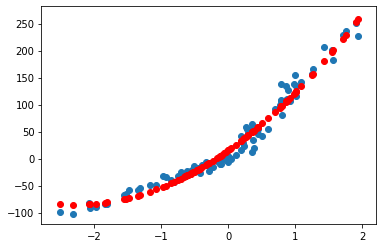

In [78]:
 #  creation d'un vecteur prediction qui contient les prédictions de notre modèle final
predictions=model(X,theta_final)
    
 #  Afficher les résultats de prédictions (en rouge) par rapport à notre Dataset (bleu)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c='r')
    

6.Courbe d'apprentissage
==

On vérifie si vraiment l'algorithme à bien convergé

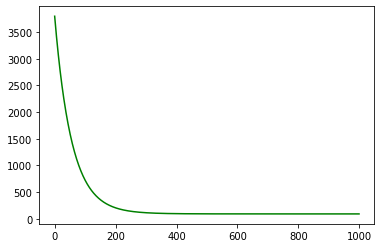

In [79]:
plt.plot(range(n_iterations),cost_history,c='green') 

On verifie la performance du modèle avec le coefficient du détermination

In [80]:
def coef_determination(y,pred):
    u=((y - pred)**2).sum()
    v=((y - y.mean())**2).sum()
    return 1 - (u/v)
coef_determination(y,predictions)

0.9735124565694022

<IPython.core.display.Javascript object>


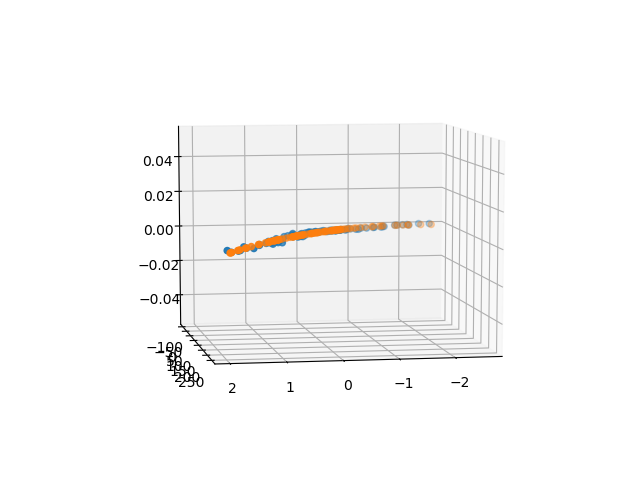

In [82]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x[:,0],y)
ax.scatter(x[:,0],predictions)